In [1]:
from data_tools import parse_boxes_from_json, get_filenames
from tiling import crop_ground_truths, get_random_tile
from targets import generate as gen
from visualize import render_boxes
from shapely.geometry import Polygon
import numpy as np
import matplotlib.pyplot as plt
from tkinter.filedialog import askopenfilename
import cv2
from pipeline_v2 import get_dataset, _get_filenames, _generate_tiles

%matplotlib inline

In [2]:
txt_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/txt/D0117-5755036.txt'
json_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json/D0117-5755036.json'
img_path = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/images/D0117-5755036.tiff'

points, polygons, _ = parse_boxes_from_json(json_path)
img = plt.imread(img_path)

In [3]:
img_dir = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/images'
json_dir = 'D:/Gerasimos/Toponym_Recognition/MapTD_General/MapTD/data/general_dataset/json'

In [4]:
img_files, gt_files = _get_filenames(img_dir, json_dir, '*', 'tiff', 'json')

In [5]:
tilegen = _generate_tiles(512, img_files, gt_files)

In [24]:
#plt.imshow(next(tilegen)[0])
#plt.show()
print(np.transpose(next(tilegen)[1], (2, 0, 1)).shape)

(19, 4, 2)


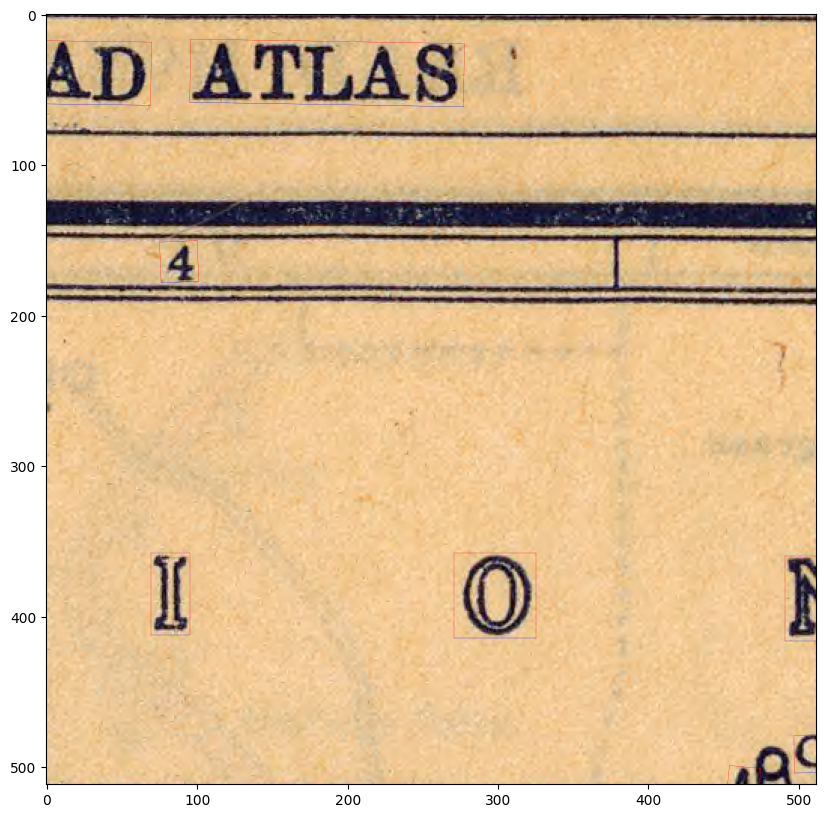

In [17]:
image, ground_truth = next(tilegen)
render_boxes(image, np.transpose(ground_truth, (2, 0, 1)))

In [ ]:
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
k = cv2.fillPoly(img, pts=points.astype(np.int32), color=(0, 0, 0))
resized_img = cv2.resize(img, (1280, 720)) # NOTE: Resize image to fit in the screen. Otherwise, I must find how to enable the cv2.window_normal option

In [ ]:
cv2.imshow('a name', resized_img)
cv2.waitKey(0)
cv2.destroyAllWindows()